# 项目3：人脸识别

欢迎来到机器学习工程师纳米学位的第三个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以'问题 X'为标题。请仔细阅读每个问题，并且在问题后的'回答问题'文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

## 任务介绍

人脸识别是一个计算机视觉任务，任务是要通过一张带有人脸的图像，对图像中的人脸进行识别并判断是谁。关于人脸识别的任务，我们一定会用到2015年Google开发的FaceNet，这个模型由于其性能非常好而被广泛使用，并且该训练好的模型已经被开源。

因此，本项目的任务将要学习人脸识别任务，在此项目中，我们将先按课程所学到的知识亲手搭建一个卷积神经网络，然后，我们将用高级的网络结构，比如ResNet50再次进行人脸识别任务，最后我们将用到预训练好的FaceNet模型。在这个过程中，我们还会用到数据增强和人脸抽取技术来提升人脸识别的精确度。

在这个人脸识别项目中，我们将使用一个开源数据集[Five Celebrity Faces Dataset](kaggle.com/dansbecker/5-celebrity-faces-dataset)，这也是一个在Kaggle比赛中的一个数据集。我们也已经下载好了并放在`./5-celebrity-faces-dataset`中，数据集中包含五位名人的照片，Ben Affleck, Elton John, Jerry Seinfeld, Madonna, Mindy Kaling。文件下分`train`和`val`。

## 数据准备
我们首先要简单的观察数据，然后通过数据增强和人脸抽取技术对数据图像数据进行抽取。你需要在完成这些操作后，思考并回答相关的问题。

### 显示一张图像

所有 train下面的图像文件名都存入 images 列表中，并将该图像的人名按顺序存于 images_name 中

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import random
from IPython.display import display
from PIL import Image

data_root = "./5-celebrity-faces-dataset/train/"

In [2]:
import numpy as np
from numpy.random import randint

In [3]:
from tensorflow.keras import backend as k

In [4]:
# Done: 把所有 train下面的图像文件名都存入 images 列表中，并将该图像的人名按顺序存于 images_name 中
images = []
images_name = []

for dir in os.listdir(data_root):
    for file in os.listdir(os.path.join(data_root, dir)):
        images_name.append(dir)
        images.append(file)
    

从`images`中随机读取一张图像，使用 `cv2.imread`读取图像，然后使用`pyplot.imshow`显示图像。注意：你需要同时显示该图像对应的人名，以及打印该图像的`shape`。

随机选取一张照片：


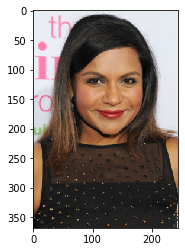

mindy_kaling
(368, 245, 3)


('./5-celebrity-faces-dataset/train/mindy_kaling\\httppixelnymagcomimgsfashiondailymindykalingwhjpg.jpg',
 'mindy_kaling')

In [5]:
# TODO: 从images 中随机读取一张图像，并获得该图像中的人名
def random_sample(images=images, images_name=images_name):
    print("随机选取一张照片：")
    # TODO：从 images 和 images_name 随机读取一个图像文件路径以及该图像的人名
    idx = randint(0, len(images))
    im_file, im_name = images[idx], images_name[idx]
    # TODO：使用 cv2.imread 读取图像文件
    img = cv2.imread(os.path.join(data_root, im_name, im_file), cv2.IMREAD_COLOR)
    # TODO：使用 plt.imshow 和 plt.show() 显示图像
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # 打印该图像的人名
    print(im_name)
    # 打印该图像的大小 shape
    print(img.shape)
    return os.path.join(data_root, im_name, im_file), im_name

random_sample(images, images_name)

随机选取一张照片：


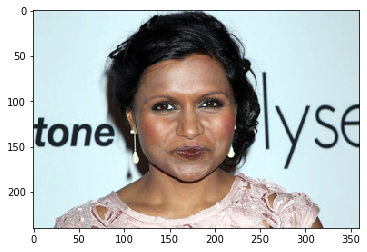

mindy_kaling
(240, 360, 3)


('./5-celebrity-faces-dataset/train/mindy_kaling\\httpwwwpictureszimbiocomfpMindyKalingfBgaONVFDFmjpg.jpg',
 'mindy_kaling')

In [6]:
random_sample(images, images_name)

你可以多次运行上面的代码来多观察一些人物图像，以此来对数据有一个大致的认知

用`cv2.imread`读取所有数据并存入`train_x`中，然后用 0,1,2,3,4 来标记 Ben Affleck, Elton John, Jerry Seinfeld, Madonna, Mindy Kaling，并将所有`images_name`数据存入`train_y`中。

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_y = le.fit_transform(images_name)

In [8]:
train_x = []
for n in range(len(images)):
    img = cv2.imread(os.path.join(data_root, images_name[n], images[n]), cv2.IMREAD_COLOR)
    train_x.append(img)

### 数据增强

首先，我们需要打印训练集的数量。

In [9]:
print(len(images))

93


我们可以看到，训练集的图像数量比较少，这对模型建模并学习图像数据到人名标签的映射关系增加了难度，所以这里需要做数据增强的工作。这里有一份很不错的资料可以帮助你了解数据增强——[Data Augmentation](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)。


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# TODO: 构造图像数据增强器

data_gen = ImageDataGenerator(
    rescale = 1./255, # TODO：缩放图像RGB值的倍数
    rotation_range = 30, # TODO：随机旋转图像的范围
    zoom_range = 0.2,  # TODO：随机缩放图像大小范围
    width_shift_range = 0.1,  # TODO：随机水平方向平移图像(fraction of total width)
    height_shift_range= 0.1,  # TODO：随机纵向平移图像(fraction of total height)
)

使用 `flow_from_directory` 遍历数据集 `./5-celebrity-faces-dataset/data`，来观察数据增强的表现。先得到一个图像迭代器，该迭代器每次都从路径里读取一个图像，并按照数据增强器的规则进行编辑图像

In [11]:
# 直接运行，得到一个图像迭代器，该迭代器每次 都从路径里读取一个图像，并按照数据增强器的规则进行编辑图像
dataflow_generator = data_gen.flow_from_directory(
    "./5-celebrity-faces-dataset/data/",
    target_size=(160, 160),
    batch_size=1,
    class_mode='categorical')

Found 5 images belonging to 5 classes.


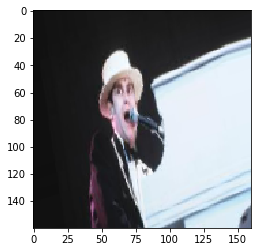

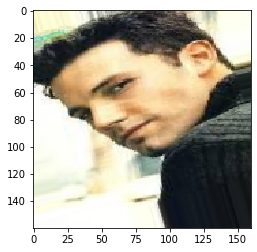

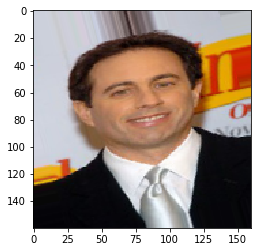

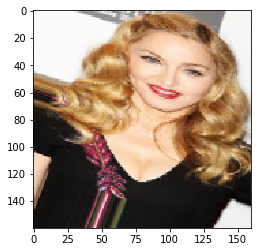

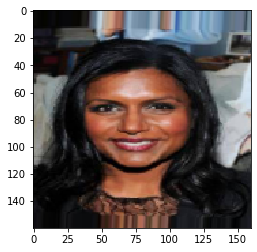

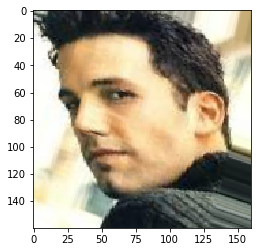

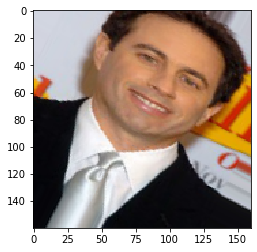

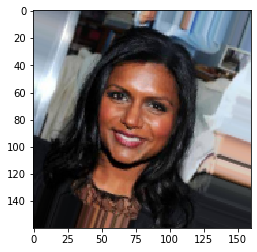

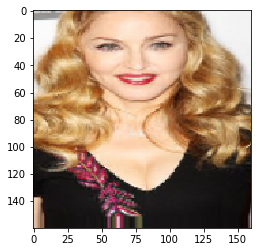

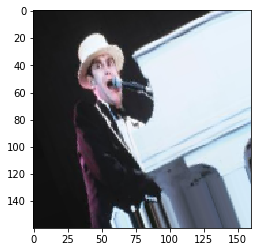

In [12]:
# TODO：从 迭代器中 读取10张图片，并显示图像
sample_count = 10
for image_data in dataflow_generator:
    # TODO：使用 plt.imshow 和 plt.show() 显示图像
    plt.imshow(np.squeeze(np.array(image_data[0])))
    plt.show()
    
    sample_count -= 1
    if sample_count <= 0:
        break

    

**问题1**：观察以上人脸图像，简单说说产生的图像中存在哪些增强的部分，然后再详细阐述你对数据增强的思考，包括为什么数据增强能够帮助人脸识别？你需要参考一些论文，并列出你的引用。

**问题回答：**
如同在配置时配置的参数，存在包括旋转角度、平移、缩放在内的数据增强。

模型的最终结果是我们训练数据集的体现。实际物体在图片中的形象可能是多种多样的。包括远近、角度、光照等等。为了丰富我们的数据集，我们需要用数据变换的方式来对我们的原始数据进行处理。扩充数据集，并让模型更加Generalize，避免过拟合。[reference](https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/)

### 人脸抽取

在做人脸识别任务中，一项常用的图像数据处理的技术是人脸检测（Face Detection）。人脸检测是将输入的图片中的人脸部分自动检测出来，具体来说就是要通过预测一个矩形边界框（Bounding Box）从整个图像中定位人脸部分，这里的矩形边界框由矩形左下角坐标以及矩形高和宽来定义。人脸检测是一个比较成熟的任务，接下来在我们这个项目中，我们将使用 Multi-Task Cascaded Convolutional Neural Network，MTCNN，你也可以参考论文：[Joint Face Detection and Alignment Using Multitask Cascaded Convolutional Networks](https://arxiv.org/abs/1604.02878)，来学习人脸检测任务。

In [13]:
# 运行下面代码，安装 mtcnn
# !pip install -i https://pypi.tuna.tsinghua.edu.cn/simple mtcnn

In [14]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


Using TensorFlow backend.


随机选取一张照片：


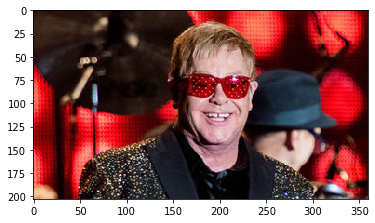

elton_john
(203, 360, 3)


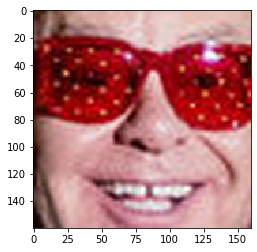

(160, 160, 3)


In [185]:
# 定义人脸抽取的函数
import PIL
from PIL import Image
from mtcnn.mtcnn import MTCNN
import numpy as np

def extract_face(filename, image_size=(160, 160)):
    # 加载图像
    image = Image.open(filename)
    # 转换RGB
    image = image.convert('RGB')
    # 转成 numpy.array 格式的数据
    image_data = np.asarray(image)
    # 创建一个人脸检测，
    detector = MTCNN()
    # 从图像中检测
    results = detector.detect_faces(image_data)
    # 返回的结果是图像中所有出现的人脸的矩形边界框，由于我们的图像中只有一张人脸，所所以只需要取结果中第一个
    box_x, box_y, width, height = results[0]['box']
    # 处理下标为负的情况
    box_x, box_y = abs(box_x), abs(box_y)
    box_x_up, box_y_up = box_x + width, box_y + height
    # 获得人脸部分的数据
    face = image_data[box_y:box_y_up, box_x:box_x_up]
    
    # TODO：把抽取出来的人脸图像 resize 至需要的图像大小，并返回numpy格式的数据
    face_img = Image.fromarray(face)
    
    height = len(face[:,0])
    width = len(face[0,:])

    if (height >= width):
        delta = height - width
        face_img = face_img.crop((0, int(delta/2), width, height - int(delta/2)))
        face_img = face_img.resize(image_size, PIL.Image.LANCZOS)
    else:
        delta = width - height
        face_img = face_img.crop((int(delta/2), 0, width - int(delta/2), height))
        face_img = face_img.resize(image_size, PIL.Image.LANCZOS)

    return np.asarray(face_img)

ran_img_file, ran_img_name = random_sample()
img = extract_face(ran_img_file)
plt.imshow(img)
plt.show()
print(img.shape)

随机选取一张照片：


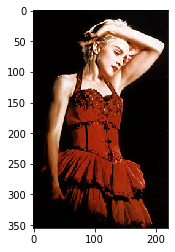

madonna
(355, 220, 3)
64
45


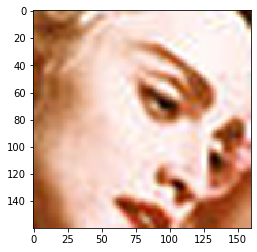

(160, 160, 3)


In [175]:
ran_img_file, ran_img_name = random_sample()
img = extract_face(ran_img_file)
plt.imshow(img)
plt.show()
print(img.shape)

**问题2：**通过多次运行以上代码并观察人脸抽取后的图像，你认为人脸检测对人脸识别有帮助吗？为什么？你需要参考一些论文，并列出你的reference。

**回答问题：**
很有必要。如果不对关键信息进行裁剪，送入模型进行训练的绝大多数信息是无用的。例如穿着，形态等等。这些信息对于人脸检测没有任何价值。

### 构造数据

现在我们可以应用以上的数据增强和人脸检测技术来构造完整的数据。

这里可以直接使用前面定义好的图像数据增强器 `data_gen`，然后使用 [ImageDataGenerator](https://keras.io/preprocessing/image/)中的 `random_transform` 对单个图像做随机增强操作。

另外，在构造数据之前，你需要先构造一个人名到类别的映射，使得在构造数据的label的时候将string格式的人名转换为int格式的类别。

编程练习：
1. 你需要 构造人名字典，将 ben_afflek、elton_john、jerry_seinfeld、madonna、mindy_kaling 分别映射到 0-1-2-3-4
2. 定义 `load_dataset`函数，遍历train或者val文件夹，读取文件夹下5个人名文件夹，以该文件夹名映射至0到4 的标签；然后分别从人名文件夹中遍历所有图像文件，读取图像，如果是train文件夹下的图像，则需要用`data_gen.random_transform`来增强图像数据，增强次数为augment_times；如果是val文件夹下的图像，则不需要进行图像增强

In [260]:
# TODO：构造人名字典，将 ben_afflek、elton_john、jerry_seinfeld、madonna、mindy_kaling 分别映射到 0-1-2-3-4
name_dict = {'ben_afflek': 0,
             'elton_john': 1,
             'jerry_seinfeld': 2,
             'madonna': 3,
             'mindy_kaling': 4}

# TODO：定义数据加载函数，data_dir为文件路径，augment_times为数据增强次数，is_train为判断是训练集还是测试集（测试集不需要数据增强）
def load_dataset(data_dir = "./5-celebrity-faces-dataset/train/", augment_times=2, is_train=True):
    data_x = []
    data_y = []
    
    for name in name_dict:
        file_path = os.path.join(data_dir, name)
        # loop in files
        for file in os.listdir(file_path):
            # Process face file
            face_np = extract_face(os.path.join(file_path, file))
            
            # Train datasets or test dataset
            if is_train == True:
                # First put the original data
                data = face_np
                data_x.append(data)
                data_y.append(name_dict[name])
                # Then do the augmentation
                for n in range(augment_times):
                    data = data_gen.random_transform(face_np)
                    data_x.append(data)
                    data_y.append(name_dict[name])
            else:
                data = face_np
                data_x.append(data)
                data_y.append(name_dict[name])
                
    return data_x, data_y

train_x, train_y = load_dataset("./5-celebrity-faces-dataset/train/", augment_times=2, is_train=True)
test_x, test_y = load_dataset("./5-celebrity-faces-dataset/val/", is_train=False)

# 最终构造好训练和测试数据
train_X = np.asarray(train_x)
train_Y = np.eye(5)[np.array(train_y)]
test_X = np.asarray(test_x)
test_Y = np.eye(5)[np.array(test_y)]

### 构建一个卷积神经网络

创建一个卷积神经网络来对人脸进行分类。在你代码块的最后，执行 `model.summary()` 来输出你模型的总结信息。
。

![Sample CNN](images/sample_cnn.png)

**问题3：**在下方的代码块中尝试使用 Keras 搭建卷积网络的架构，并回答相关的问题。

1. 你可以尝试自己搭建一个卷积网络的模型，那么你需要回答你搭建卷积网络的具体步骤（用了哪些层）以及为什么这样搭建。
2. 你也可以根据上图提示的步骤搭建卷积网络，那么请说明如上的架构能够在该问题上取得的表现。


**回答问题：**

In [261]:
train_X.shape

(279, 160, 160, 3)

In [262]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(160, 160, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=24, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = 4))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

### TODO: 定义你的网络架构

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6462 (Conv2D)         (None, 160, 160, 16)      208       
_________________________________________________________________
max_pooling2d_3239 (MaxPooli (None, 80, 80, 16)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_6463 (Conv2D)         (None, 80, 80, 16)        1040      
_________________________________________________________________
conv2d_6464 (Conv2D)         (None, 80, 80, 24)        1560      
_________________________________________________________________
max_pooling2d_3240 (MaxPooli (None, 40, 40, 24)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 40, 40, 24)      

In [263]:
# 直接运行编译模型和训练模型

# 编译模型
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# 模型训练
model.fit(train_X, train_Y, batch_size=8, epochs=50)

Epoch 1/50
279/279 [==============================] - 1s 4ms/step - loss: 22.5889 - accuracy: 0.1935
Epoch 2/50
279/279 [==============================] - 0s 2ms/step - loss: 2.9616 - accuracy: 0.2509
Epoch 3/50
279/279 [==============================] - 1s 2ms/step - loss: 1.9149 - accuracy: 0.2401
Epoch 4/50
279/279 [==============================] - 0s 2ms/step - loss: 1.7120 - accuracy: 0.2186
Epoch 5/50
279/279 [==============================] - 0s 2ms/step - loss: 1.6194 - accuracy: 0.2652
Epoch 6/50
279/279 [==============================] - 1s 3ms/step - loss: 1.6373 - accuracy: 0.2258
Epoch 7/50
279/279 [==============================] - 1s 2ms/step - loss: 1.5828 - accuracy: 0.2867
Epoch 8/50
279/279 [==============================] - 1s 3ms/step - loss: 1.5149 - accuracy: 0.3369
Epoch 9/50
279/279 [==============================] - 1s 2ms/step - loss: 1.4914 - accuracy: 0.3620
Epoch 10/50
279/279 [==============================] - 1s 2ms/step - loss: 1.4168 - accuracy: 0.412

#### 模型测试

你需要编写一个自动测试模型准确率的函数。

In [264]:
name_dict_inv = {v: k for k, v in name_dict.items()}

Simple CNN Accuracy: 0.800


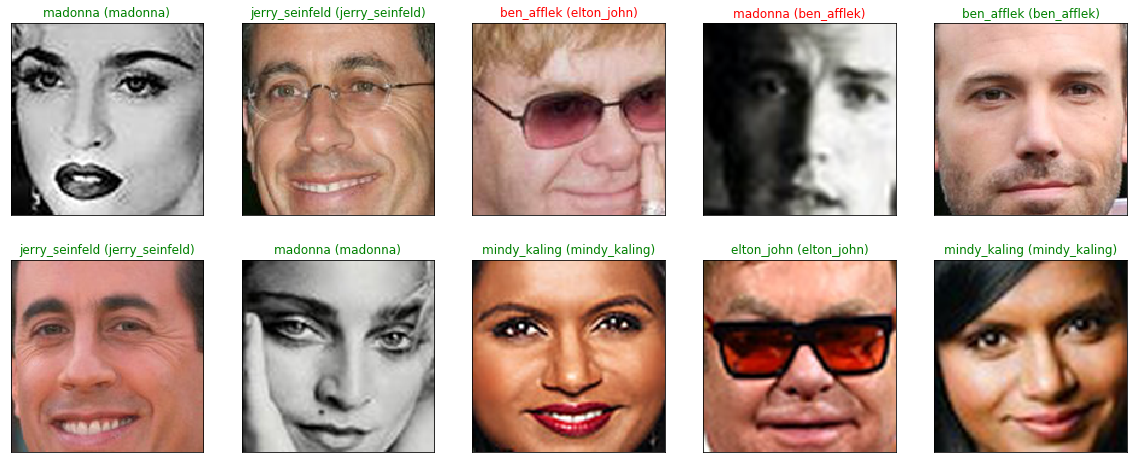

In [269]:
def metric_accuracy(model, test_X, test_Y, model_name):
    preds_Y = model.predict(test_X)
    #TODO：通过预测值preds_Y以及真实值test_Y，来计算准确率
    
    accuracy = 0
    
    for n in range(len(preds_Y[:,1])):
        idx = np.where(preds_Y[n,:] == np.amax(preds_Y[n,:]))
        if test_Y[n, idx[0].item()] > 0.5:
            accuracy += 1
        else:
            accuracy += 0

    accuracy = accuracy / (len(preds_Y[:,1]))
    
    print("%s Accuracy: %.3f" % (model_name, accuracy))
    
    fig = plt.figure(figsize=(20, 8))
    for i, idx in enumerate(np.random.choice(test_X.shape[0], size=10, replace=False)):
        ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_X[idx]))
        pred_idx = np.argmax(preds_Y[idx])
        true_idx = np.argmax(test_Y[idx])
        ax.set_title("{} ({})".format(name_dict_inv[pred_idx], name_dict_inv[true_idx]), 
                     color=("green" if pred_idx == true_idx else "red"))

metric_accuracy(model, test_X, test_Y, "Simple CNN")

### 进阶 CNN 模型架构
在计算机视觉任务中，有一些复杂的高级CNN模型架构，比如ResNet、VGG、Inception 等等，他们能够对图像有一个非常好的表达。并且，已经有人把这些模型在非常大的图像数据上训练好了参数，这使得预训练的大模型能够对图像有一个很好的特征表达。这种在大规模图像数据上学到的图像特征，能够迁移到人脸图像的特征表示。

在这一小节，我们利用预训练好的 ResNet50,抽取图像特征，然后再去做人脸识别。虽然 ResNet50 在各种图像上面进行预训练的，但是该模型对图像结构特征信息的学习也能够帮助人脸识别任务中的预测。


In [279]:
import keras 
from keras.models import Model, Sequential

# 模型底层使用 ResNet50 对原始图像进行建模，特征抽取
resnet50_weights = "./models/resnet50_weights.h5"
resnet = keras.applications.resnet50.ResNet50(weights=None, include_top=False, input_shape=(160, 160, 3))
resnet.load_weights(resnet50_weights)

for layer in resnet.layers:
    layer.trainable = False

# TODO：自己定义模型顶层，使用抽取后的特征进行人脸识别
resnet_face = Sequential()
resnet_face.add(Flatten(input_shape=resnet.output_shape[1:]))
resnet_face.add(Dense(128, activation='relu'))
resnet_face.add(Dropout(0.3))
resnet_face.add(Dense(5, activation='softmax'))

resnet_face_model = Model(inputs=resnet.input, outputs=resnet_face(resnet.output))
resnet_face_model.summary()

D:\01_MLNewWorld\NN_Anaconda3\envs\keras-gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_1611"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1611 (InputLayer)         (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_1611[0][0]                 
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 80, 80, 64)   256         conv1[0][0]                      
_________________________________________________________________________________________

In [280]:
resnet_face.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1086 (Flatten)       (None, 51200)             0         
_________________________________________________________________
dense_3773 (Dense)           (None, 128)               6553728   
_________________________________________________________________
dropout_53 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_3774 (Dense)           (None, 5)                 645       
Total params: 6,554,373
Trainable params: 6,554,373
Non-trainable params: 0
_________________________________________________________________


In [281]:
# 设置同样的训练参数，直接运行

## 编译模型
resnet_face_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# 模型训练
resnet_face_model.fit(train_X, train_Y, batch_size=8, epochs=50)

Epoch 1/50
279/279 [==============================] - 3s 11ms/step - loss: 6.9555 - accuracy: 0.5018
Epoch 2/50
279/279 [==============================] - 2s 6ms/step - loss: 0.7527 - accuracy: 0.8244
Epoch 3/50
279/279 [==============================] - 2s 6ms/step - loss: 0.3097 - accuracy: 0.9032
Epoch 4/50
279/279 [==============================] - 2s 6ms/step - loss: 0.3371 - accuracy: 0.9211
Epoch 5/50
279/279 [==============================] - 2s 6ms/step - loss: 0.3674 - accuracy: 0.9176
Epoch 6/50
279/279 [==============================] - 2s 6ms/step - loss: 0.3026 - accuracy: 0.9498
Epoch 7/50
279/279 [==============================] - 2s 6ms/step - loss: 0.1262 - accuracy: 0.9857
Epoch 8/50
279/279 [==============================] - 2s 6ms/step - loss: 0.2230 - accuracy: 0.9677
Epoch 9/50
279/279 [==============================] - 2s 6ms/step - loss: 0.1630 - accuracy: 0.9606
Epoch 10/50
279/279 [==============================] - 2s 6ms/step - loss: 0.1923 - accuracy: 0.967

模型测试

ResNet50 Accuracy: 0.880


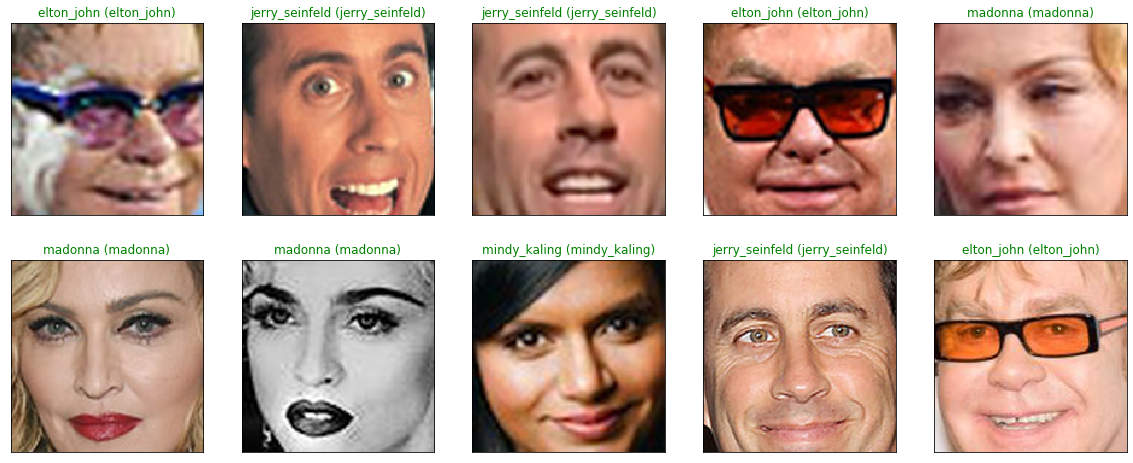

In [282]:
# 直接运行，测试 resnet_face_model 的准确率
metric_accuracy(resnet_face_model, test_X, test_Y, "ResNet50")


**问题5：**对比 ResNet50 模型和 CNN 模型的结果，请你分析为什么 ResNet50 模型能够取得更好的结果？

**回答问题：**


首先ResNet50模型更复杂，能捕捉到更多种类的特征。其次ResNet50经过其他图片的预训练，在普适性上有更好的性能。一个需要注意的问题是，由于缺少validation sets，在训练集上很快accuracy达到接近1，很明显对training sets已经开始over fitting。


**问题6：**上面我们使用了预训练好的 ResNet50，即`resnet.load_weights(resnet50_weights)`，那么加载预训练好的参数对该任务有帮助吗？你需要通过做对比实验，即不加载预训练好的参数，然后在下面的代码框中重新跑一遍 ResNet50 的模型，来作为对比说明加载预训练是否有帮助

**回答问题：**


如下实验所示。未加载训练的ResNet50模型，直接使用自有的数据集进行训练，效果很差。原因可能：训练集太少，模型太复杂，且epoch很少，无法让模型提取出有效特征。

In [283]:
# 重新跑一遍不加载预训练参数的 ResNet50 的模型，请在此处写完整的code

resnet_noTrain = keras.applications.resnet50.ResNet50(weights=None, include_top=False, input_shape=(160, 160, 3))

# TODO：自己定义模型顶层，使用抽取后的特征进行人脸识别
resnet_noTrain_face = Sequential()
resnet_noTrain_face.add(Flatten(input_shape=resnet.output_shape[1:]))
resnet_noTrain_face.add(Dense(128, activation='relu'))
resnet_noTrain_face.add(Dropout(0.3))
resnet_noTrain_face.add(Dense(5, activation='softmax'))

resnet_face_model_New = Model(inputs=resnet_noTrain.input, outputs=resnet_noTrain_face(resnet_noTrain.output))
resnet_face_model_New.summary()

Model: "model_1612"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1612 (InputLayer)         (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 166, 166, 3)  0           input_1612[0][0]                 
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 80, 80, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 80, 80, 64)   256         conv1[0][0]                      
_________________________________________________________________________________________

D:\01_MLNewWorld\NN_Anaconda3\envs\keras-gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [284]:
## 编译模型
resnet_face_model_New.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# 模型训练
resnet_face_model_New.fit(train_X, train_Y, batch_size=8, epochs=50)

Epoch 1/50
279/279 [==============================] - 17s 60ms/step - loss: 44.7476 - accuracy: 0.2330
Epoch 2/50
279/279 [==============================] - 7s 24ms/step - loss: 5.0602 - accuracy: 0.2115
Epoch 3/50
279/279 [==============================] - 7s 24ms/step - loss: 1.8584 - accuracy: 0.2043
Epoch 4/50
279/279 [==============================] - 7s 24ms/step - loss: 1.6079 - accuracy: 0.1935
Epoch 5/50
279/279 [==============================] - 7s 24ms/step - loss: 1.6070 - accuracy: 0.2258 0s - loss: 1.6063 - accura
Epoch 6/50
279/279 [==============================] - 7s 24ms/step - loss: 1.6062 - accuracy: 0.2366
Epoch 7/50
279/279 [==============================] - 7s 24ms/step - loss: 1.6055 - accuracy: 0.2366
Epoch 8/50
279/279 [==============================] - 7s 24ms/step - loss: 1.6048 - accuracy: 0.2366
Epoch 9/50
279/279 [==============================] - 7s 24ms/step - loss: 2.5143 - accuracy: 0.2437
Epoch 10/50
279/279 [==============================] - 7s 24ms

ResNet50 without pre-train Accuracy: 0.200


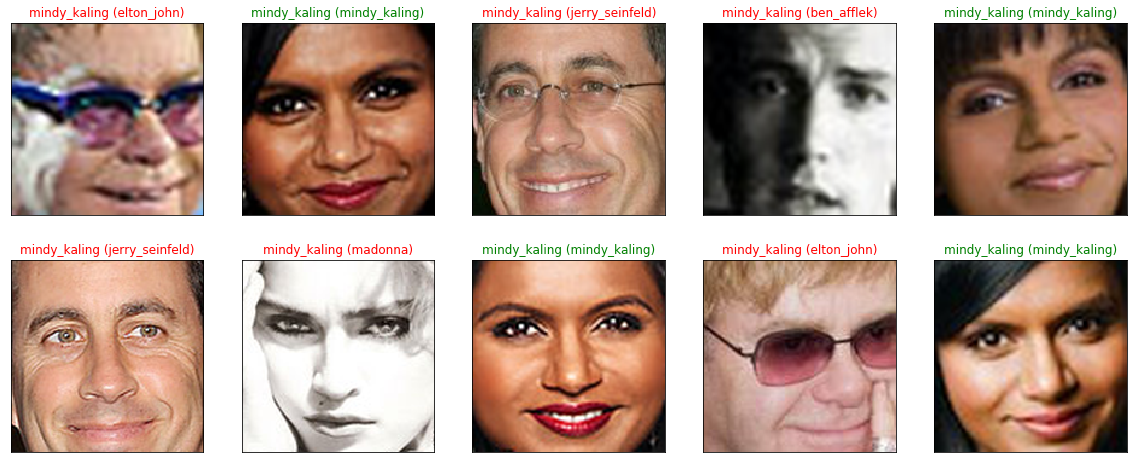

In [285]:
metric_accuracy(resnet_face_model_New, test_X, test_Y, "ResNet50 without pre-train")

### FaceNet 

上一小节中，我们利用了预训练好的 ResNet50 来抽取图像特征，而这一小节我们将利用预训练好的 FaceNet 来抽取人脸特征。我们已经知道 ResNet50 是在大规模数据上建模学习图像特征的，这里面的数据是多种多样的，不限制于人脸图像，而 [FaceNet](https://arxiv.org/pdf/1503.03832.pdf) 是专门对于人脸进行特征抽取的工具。

In [286]:
# TODO：使用 load_model 从`./models/facenet_keras.h5` 加载模型
from keras.models import load_model

# 模型底层使用 FaceNet 对原始图像进行建模，特征抽取
# 加载预训练好的 FaceNet 模型。
facenet_model = load_model('./models/facenet_keras.h5')
print("FaceNet model loaded...")

# TODO：自己定义模型顶层，使用抽取后的特征进行人脸识别
facenet_face = Sequential()
facenet_face.add(Dense(128, activation='relu'))
facenet_face.add(Dropout(0.3))
facenet_face.add(Dense(5, activation='softmax'))


facenet_face_model = Model(inputs=facenet_model.input, outputs=facenet_face(facenet_model.output))
facenet_face_model.summary()


D:\01_MLNewWorld\NN_Anaconda3\envs\keras-gpu\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


FaceNet model loaded...
Model: "model_1613"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
_________________________________________________________________

__________________________________________________________________________________________________
Block8_5_Branch_0_Conv2d_1x1 (C (None, 3, 3, 192)    344064      Block8_4_Activation[0][0]        
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    110592      Block8_5_Branch_1_Conv2d_0b_1x3_A
__________________________________________________________________________________________________
Block8_5_Branch_0_Conv2d_1x1_Ba (None, 3, 3, 192)    576         Block8_5_Branch_0_Conv2d_1x1[0][0
__________________________________________________________________________________________________
Block8_5_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    576         Block8_5_Branch_1_Conv2d_0c_3x1[0
__________________________________________________________________________________________________
Block8_5_Branch_0_Conv2d_1x1_Ac (None, 3, 3, 192)    0           Block8_5_Branch_0_Conv2d_1x1_Batc
__________

In [287]:
train_XX = []
for x in train_X:
    x_image = Image.fromarray(x)
    x_image = x_image.resize((160, 160))
    train_XX.append(np.asarray(x_image))
train_X = np.array(train_XX)
train_X[0].shape

(160, 160, 3)

In [288]:
## 编译模型
facenet_face_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# 模型训练
facenet_face_model.fit(train_X, train_Y, batch_size=8, epochs=50)

Epoch 1/50
279/279 [==============================] - 27s 95ms/step - loss: 0.9367 - accuracy: 0.6738
Epoch 2/50
279/279 [==============================] - 6s 23ms/step - loss: 0.5738 - accuracy: 0.8315
Epoch 3/50
279/279 [==============================] - 7s 24ms/step - loss: 0.5783 - accuracy: 0.8100
Epoch 4/50
279/279 [==============================] - 7s 24ms/step - loss: 0.3730 - accuracy: 0.8746
Epoch 5/50
279/279 [==============================] - 7s 24ms/step - loss: 0.3591 - accuracy: 0.8817
Epoch 6/50
279/279 [==============================] - 6s 23ms/step - loss: 0.2369 - accuracy: 0.9176
Epoch 7/50
279/279 [==============================] - 7s 23ms/step - loss: 0.2702 - accuracy: 0.9211
Epoch 8/50
279/279 [==============================] - 7s 25ms/step - loss: 0.1951 - accuracy: 0.9534
Epoch 9/50
279/279 [==============================] - 7s 24ms/step - loss: 0.2583 - accuracy: 0.9319
Epoch 10/50
279/279 [==============================] - 7s 24ms/step - loss: 0.2151 - accur

In [290]:
test_XX = []
for x in test_X:
    x_image = Image.fromarray(x)
    x_image = x_image.resize((160, 160))
    test_XX.append(np.asarray(x_image))
test_X = np.array(test_XX)
test_X[0].shape

preds_Y = facenet_face_model.predict(test_X)
correct = 0.
for pr, y in zip(preds_Y, test_Y):
    pr_cls = np.argmax(pr)
    if y[pr_cls] == 1:
        correct += 1
accuracy = correct / len(preds_Y)
print("FaceNet Accuracy: %.3f" % accuracy)

FaceNet Accuracy: 0.800


**问题7：**评价 FaceNet 模型的效果，并指出为什么 FaceNet 比上一小节中 ResNet 的效果要好。

**回答问题：**

FaceNet在这个实验中并没有表现出比ResNet更好的效果。原因可能是FaceNet出现了过拟合。需要把Training sets进一步拆分出Valid Sets，并用early stop的方式避免过拟合。同时，训练过程没有checkpoint，无法选择更早产生的更优模型。本着不能用测试集情况对模型进行调试的原则，我并没有对模型hyper parameters进一步调试。

另外，该实验的测试集数量较少。可能存在bias的情况。

**问题8：**
- 首先你需要在下放画一个表格，将上面所做的实验结果都列出来。
- 然后总结此项目，你认为在这个**人脸识别**项目中，哪些技术对识别准确率起比较重要的作用？请结合以上的实验结果分析。
- 最后，你再简要说说还有哪些技术对人脸识别任务有较大的帮助？列出你的references

**回答问题：**
实验结果总结

|Models|Accuracy|
|---|---|
|CNN|80%|
|ResNet50 no-pretrain|20%|
|ResNet50 pretrain|88%|
|FaceNet|80%|

**技术对识别率起到的作用**
- 使用pre-trained模型，可以借助其他训练成果
- 数据augmentation。很关键。使用data augmentation为模型提高了20%左右的准确率（notebook中未体现，实验结果）。
- 数据清洗。对数据清洗，去掉不必要的噪声，有利于模型识别关键信息。


**还有哪些技术可以起到帮助**
- 数据，越多越好
- 对训练集进行划分，并使用early stopping等技术避免对训练集过拟合
- 网络并不是越大越好。主要还是过拟合的问题。。